
Task-04

Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.



Sample Dataset :- https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

In [62]:
columns = ['id','country','Sentiment','Text']
df = pd.read_csv('twitter_training.csv', names=columns)

In [63]:
df.head(5)

,id,country,Sentiment,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [64]:
df.shape

(74682, 4)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         74682 non-null  int64 
 1   country    74682 non-null  object
 2   Sentiment  74682 non-null  object
 3   Text       73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [ ]:
# Check the distribution of Emotion
df['Sentiment'].value_counts()

In [68]:
# Show sample
for i in range(5):
    print(f"{i+1}: {df['Text'][i]} -> {df['Sentiment'][i]}")

1: im getting on borderlands and i will murder you all , -> Positive
2: I am coming to the borders and I will kill you all, -> Positive
3: im getting on borderlands and i will kill you all, -> Positive
4: im coming on borderlands and i will murder you all, -> Positive
5: im getting on borderlands 2 and i will murder you me all, -> Positive


In [69]:
#Drop nan values
df.dropna(inplace=True)

In [95]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
le_model = LabelEncoder()

# Apply LabelEncoder to the 'Label' column
df['Sentiment'] = le_model.fit_transform(df['Sentiment'])


In [96]:
df.head(5)

,id,country,Sentiment,Text,Preprocessed Text
0,2401,borderlands,1,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...
1,2401,borderlands,1,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...
2,2401,borderlands,1,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you all
3,2401,borderlands,1,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
4,2401,borderlands,1,im getting on borderlands 2 and i will murder ...,im getting on borderlands 2 and i will murder ...


In [87]:
#Preprocessed the data

print("Missing values before preprocessing:")
print(df.isnull().sum())

Missing values before preprocessing:
id                   0
country              0
Sentiment            0
Text                 0
Preprocessed Text    0
dtype: int64


In [91]:
df.drop_duplicates(inplace=True)
df['country'] = df['country'].str.lower()

In [92]:
print("Cleaned dataset:")
print(df.head())

Cleaned dataset:
     id      country  Sentiment  \
0  2401  borderlands          3   
1  2401  borderlands          3   
2  2401  borderlands          3   
3  2401  borderlands          3   
4  2401  borderlands          3   

                                                Text  \
0  im getting on borderlands and i will murder yo...   
1  I am coming to the borders and I will kill you...   
2  im getting on borderlands and i will kill you ...   
3  im coming on borderlands and i will murder you...   
4  im getting on borderlands 2 and i will murder ...   

                                   Preprocessed Text  
0  im getting on borderlands and i will murder yo...  
1  i am coming to the borders and i will kill you...  
2  im getting on borderlands and i will kill you all  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  


[nltk_data] Downloading package vader_lexicon to C:\Users\Nagina
[nltk_data]     Abbas\AppData\Roaming\nltk_data...


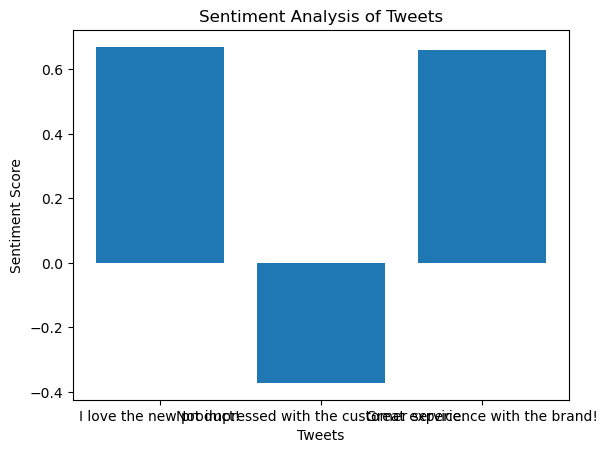

In [59]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

nltk.download('vader_lexicon')

# Example text data
tweets = ["I love the new product!", "Not impressed with the customer service.", "Great experience with the brand!"]

# Sentiment Analysis
sia = SentimentIntensityAnalyzer()
sentiment_scores = [sia.polarity_scores(tweet)["compound"] for tweet in tweets]

# Visualization
plt.bar(range(len(tweets)), sentiment_scores, tick_label=tweets)
plt.xlabel('Tweets')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Analysis of Tweets')
plt.show()


In [103]:
# Visualize Sentiment Trends

from nltk.sentiment.vader import SentimentIntensityAnalyzer
     

In [104]:
df.Sentiment.unique()

array([1, 2, 0])

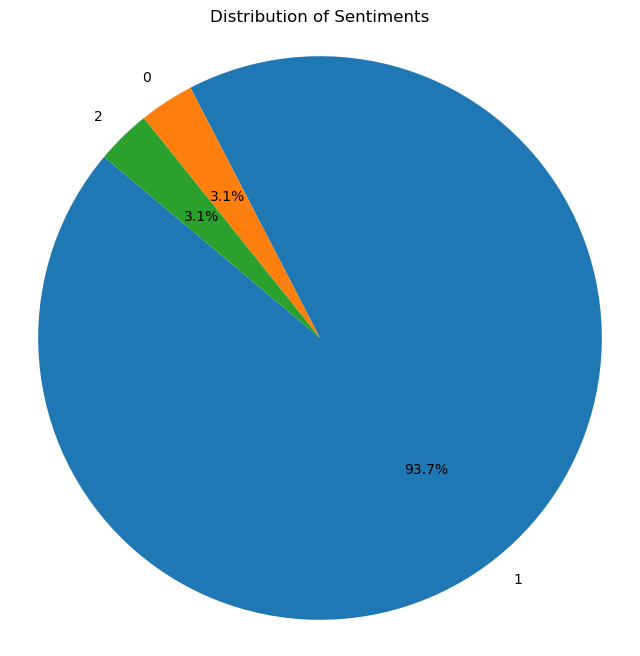

In [105]:
# Calculate the distribution of sentiments
sentiment_distribution = df['Sentiment'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_distribution, labels=sentiment_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Sentiments')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.

# Show the pie chart 42.2
plt.show()

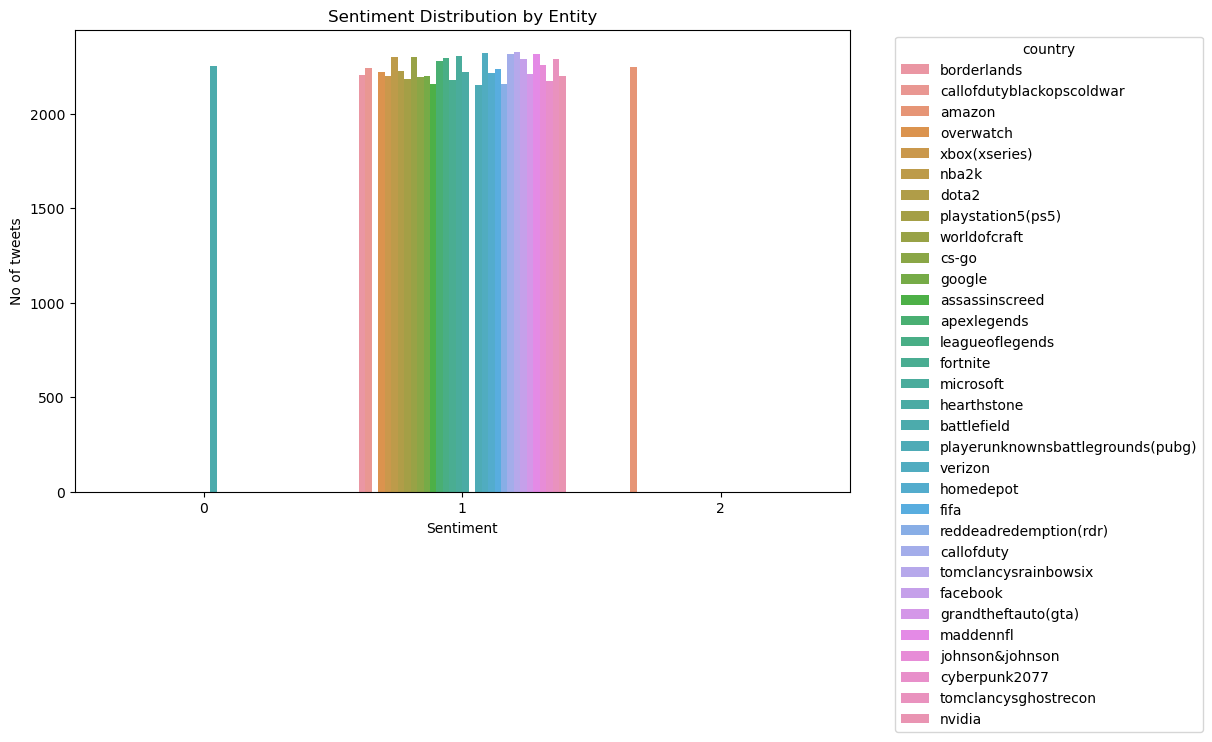

In [106]:
# Example for sentiment distribution by entity
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Sentiment',hue='country')
plt.title("Sentiment Distribution by Entity")
plt.xlabel("Sentiment")
plt.ylabel("No of tweets")
plt.legend(title= 'country',bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

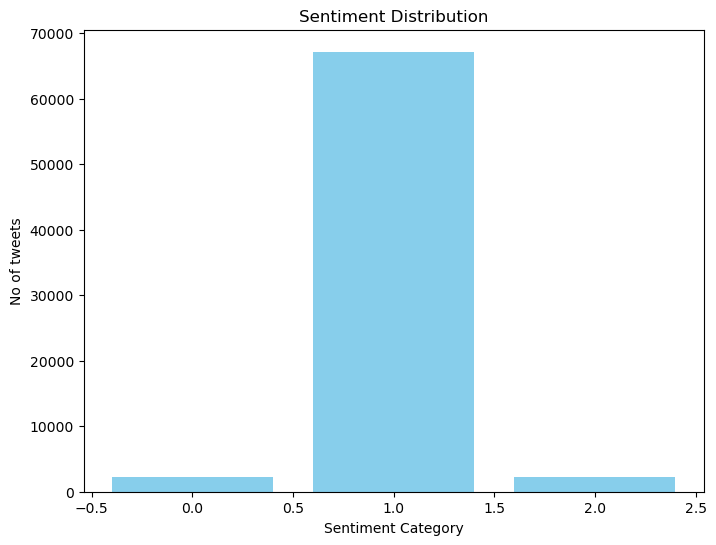

In [107]:
# lets Calculate the distribution of predicted sentiments
sentiment_distribution = df['Sentiment'].value_counts()

# Create a bar chart for sentiment distribution
plt.figure(figsize=(8, 6))
plt.bar(sentiment_distribution.index, sentiment_distribution.values, color='skyblue')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Category')
plt.ylabel('No of tweets')

# Show the bar chart
plt.show()
     

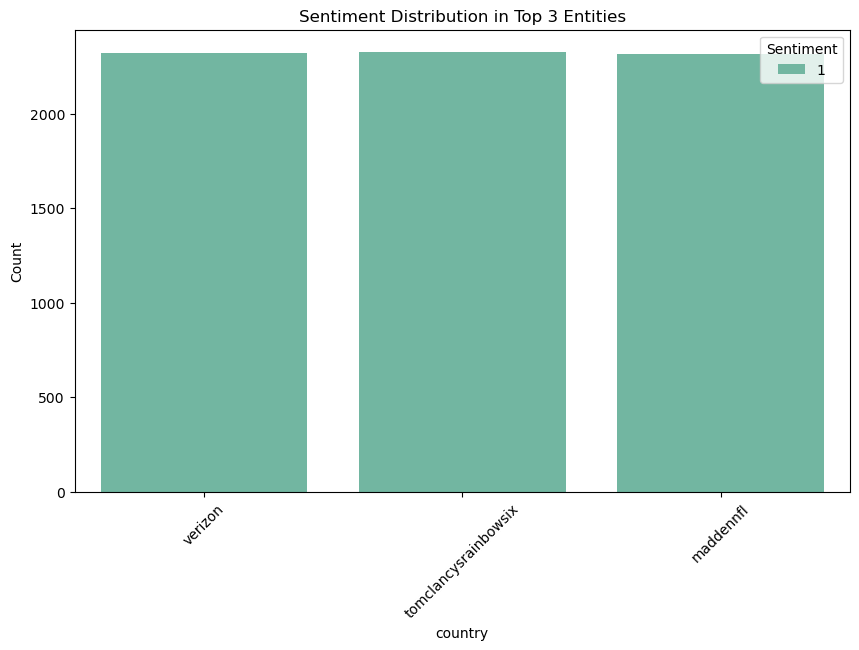

In [108]:
# Calculate the distribution of entities
entity_distribution = df['country'].value_counts()

# Select the top 3 entities
top_3_entities = entity_distribution.head(3).index

# Filter the DataFrame to include only the top 3 entities
df_top_3 = df[df['country'].isin(top_3_entities)]

# Create a grouped bar chart for sentiment distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df_top_3, x='country', hue='Sentiment', palette='Set2')
plt.title('Sentiment Distribution in Top 3 Entities')
plt.xlabel('country')
plt.ylabel('Count')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the grouped bar chart
plt.show()

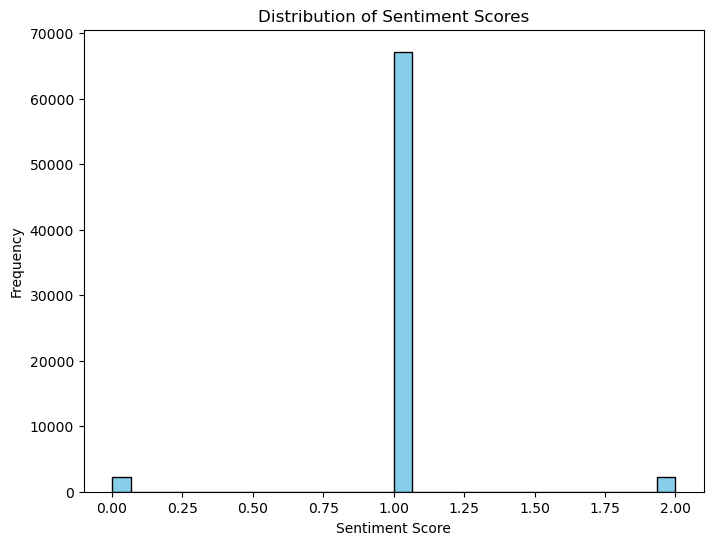

In [109]:
import matplotlib.pyplot as plt

# Create a histogram of sentiment scores
plt.figure(figsize=(8, 6))
plt.hist(df['Sentiment'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')

# Show the histogram
plt.show()

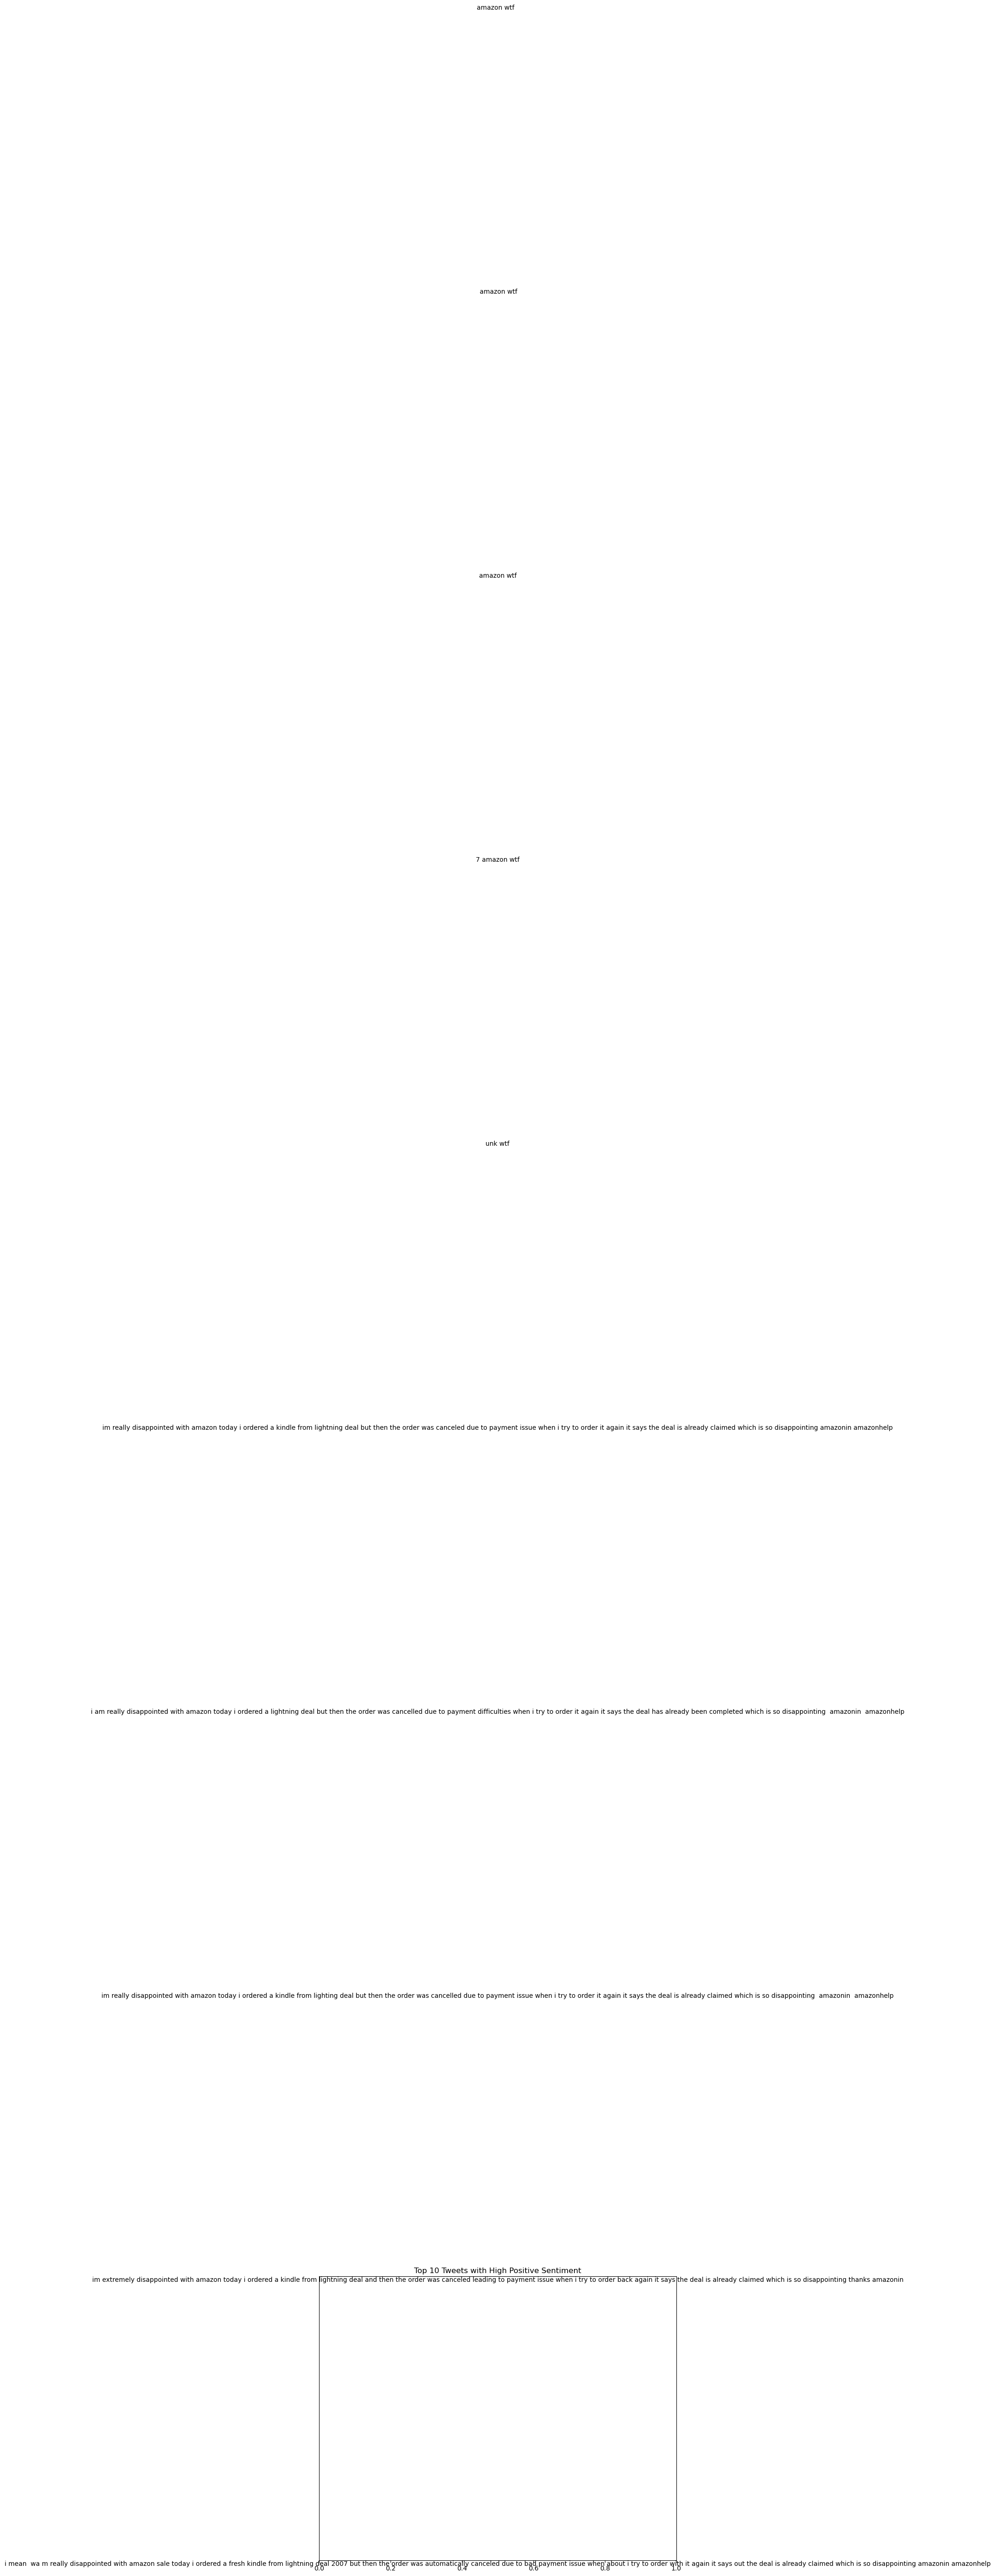

In [116]:
%matplotlib inline
import matplotlib.pyplot as plt
# Get tweets with high positive sentiment
high_positive_tweets = df[df['Sentiment'] == 'Positive'].head(10)
# Plot high positive sentiment tweets
plt.figure(figsize=(10, 8))
for i, tweet in enumerate(high_positive_tweets['Preprocessed Text']):
    plt.text(0.5, len(high_positive_tweets) - i - 1, tweet, fontsize=10, ha='center', va='top')
plt.gca().axes.get_yaxis().set_visible(False)
plt.title('Top 10 Tweets with High Positive Sentiment')
plt.show()

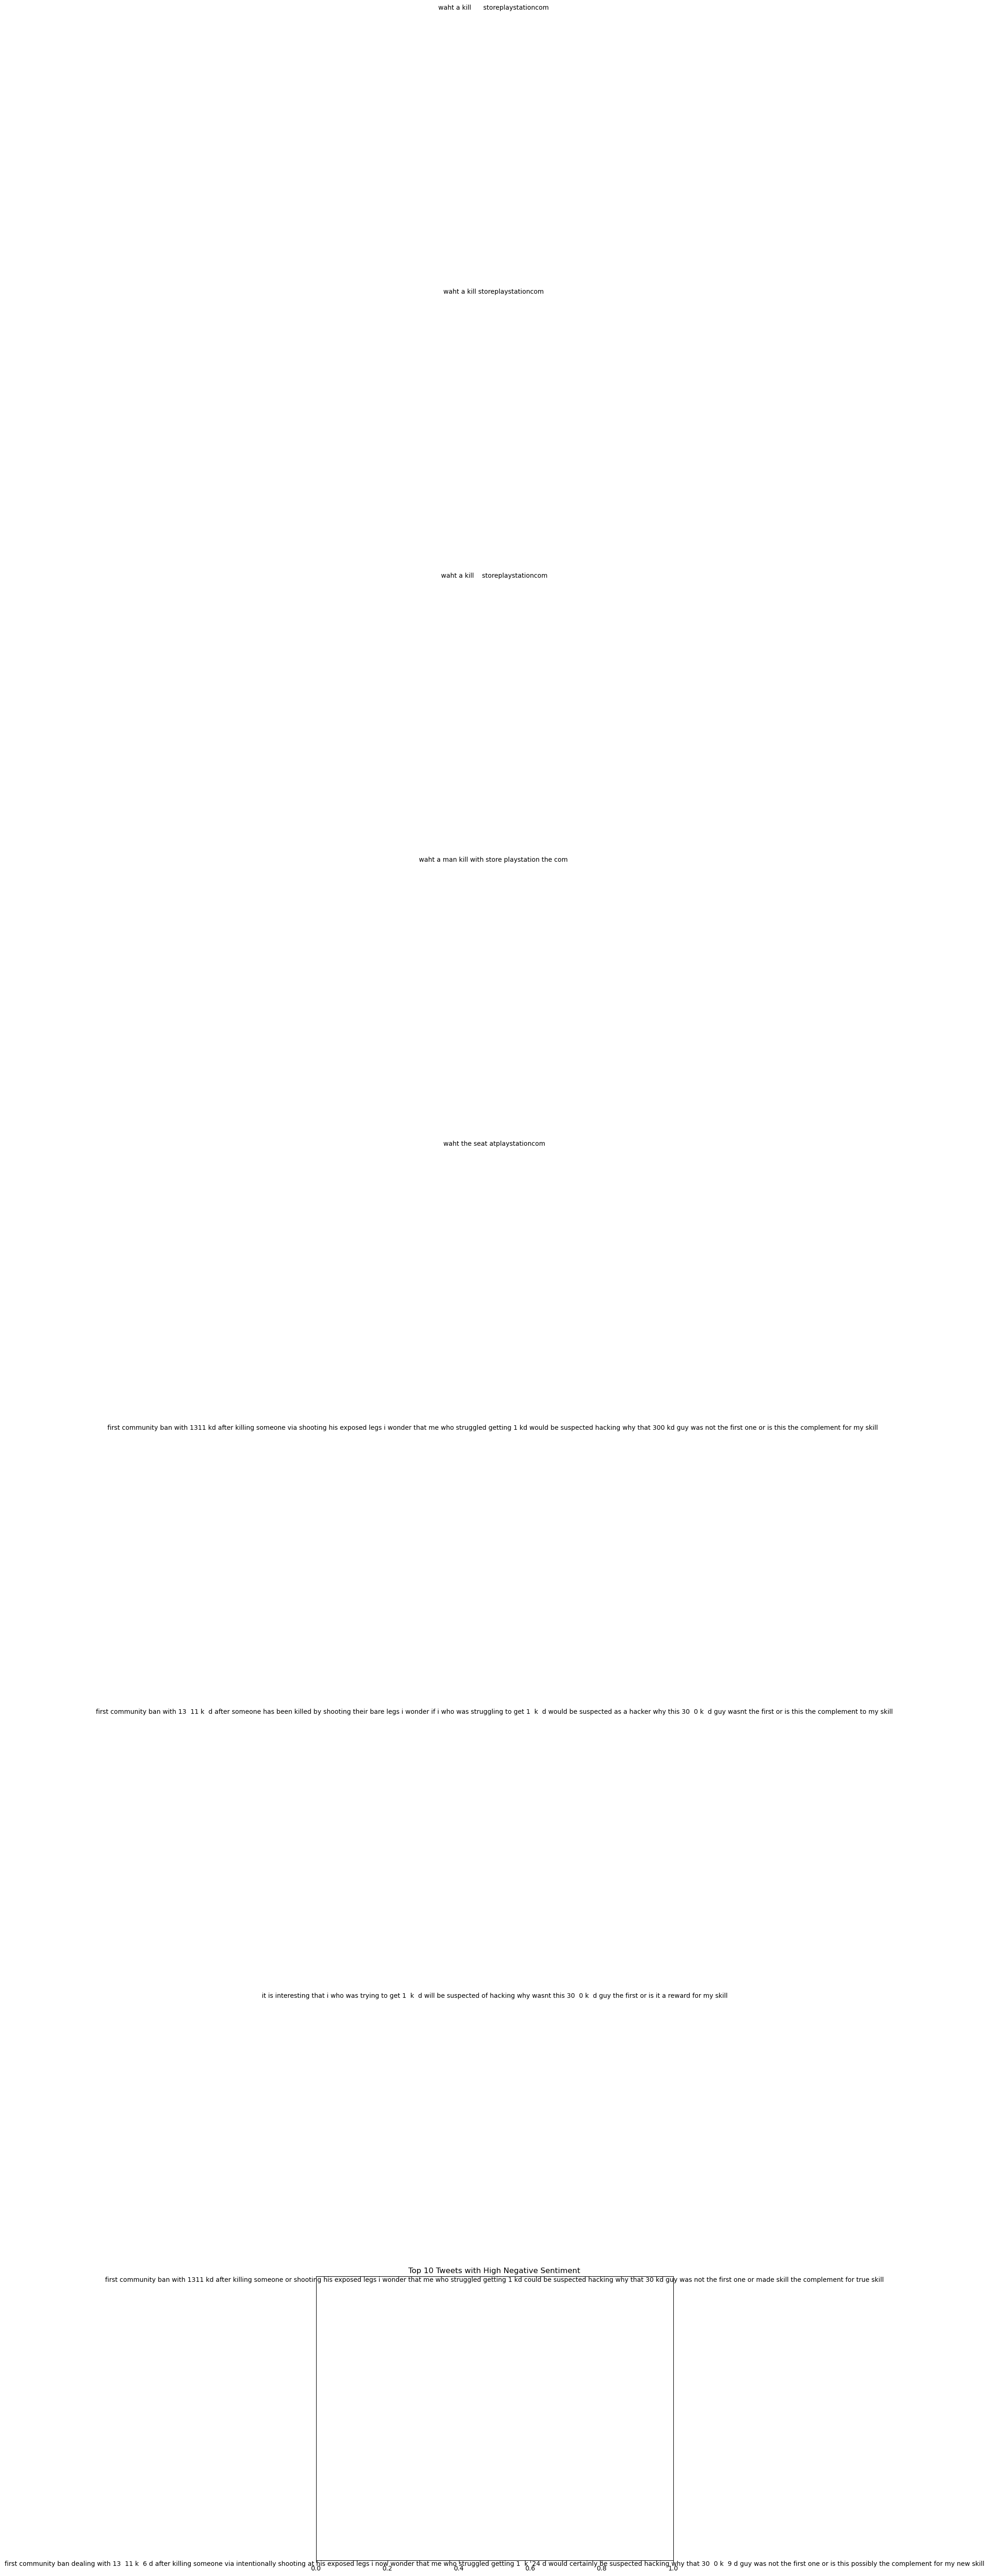

In [115]:
%matplotlib inline
import matplotlib.pyplot as plt

# Get tweets with high negative sentiment
high_negative_tweets = df[df['Sentiment'] == 'Negative'].head(10)

# Plot high negative sentiment tweets
plt.figure(figsize=(10, 8))
for i, tweet in enumerate(high_negative_tweets['Preprocessed Text']):
    plt.text(0.5, len(high_negative_tweets) - i - 1, tweet, fontsize=10, ha='center', va='top')
plt.gca().axes.get_yaxis().set_visible(False)
plt.title('Top 10 Tweets with High Negative Sentiment')
plt.show()


In [112]:
# perform sentiment analysis

from nltk.sentiment.vader import SentimentIntensityAnalyzer
# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Define a function to get the sentiment score of each content
def get_sentiment_score(text):
    sentiment = sia.polarity_scores(text)
    compound_score = sentiment['compound']
    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the function to calculate sentiment for each content
df['Sentiment'] = df['country'].apply(get_sentiment_score)

# Display the first few rows of the dataset with sentiment analysis results
print(df.head())

                             id      country Sentiment  \
0 1970-01-01 00:00:00.000002401  borderlands   Neutral   
1 1970-01-01 00:00:00.000002401  borderlands   Neutral   
2 1970-01-01 00:00:00.000002401  borderlands   Neutral   
3 1970-01-01 00:00:00.000002401  borderlands   Neutral   
4 1970-01-01 00:00:00.000002401  borderlands   Neutral   

                                                Text  \
0  im getting on borderlands and i will murder yo...   
1  I am coming to the borders and I will kill you...   
2  im getting on borderlands and i will kill you ...   
3  im coming on borderlands and i will murder you...   
4  im getting on borderlands 2 and i will murder ...   

                                   Preprocessed Text  Sentiment_Value  
0  im getting on borderlands and i will murder yo...              NaN  
1  i am coming to the borders and i will kill you...              NaN  
2  im getting on borderlands and i will kill you all              NaN  
3  im coming on borderland

In [113]:
# Aggregate Data:

import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\Nagina
[nltk_data]     Abbas\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [114]:

# Convert 'ID' column to datetime format
df['id'] = pd.to_datetime(df['id'])

# Map sentiment categories to numeric values
sentiment_mapping = {'Positive': 1, 'Negative': -1, 'Neutral': 0}
df['Sentiment_Value'] = df['Sentiment'].map(sentiment_mapping)

# Group the data by daily or weekly time period and calculate the average sentiment score
# Here, we'll aggregate sentiment scores on a daily basis
daily_sentiment = df.groupby(df['id'].dt.date)['Sentiment_Value'].mean()

# Display the aggregated sentiment scores
print(daily_sentiment)


id
1970-01-01   -0.000084
Name: Sentiment_Value, dtype: float64


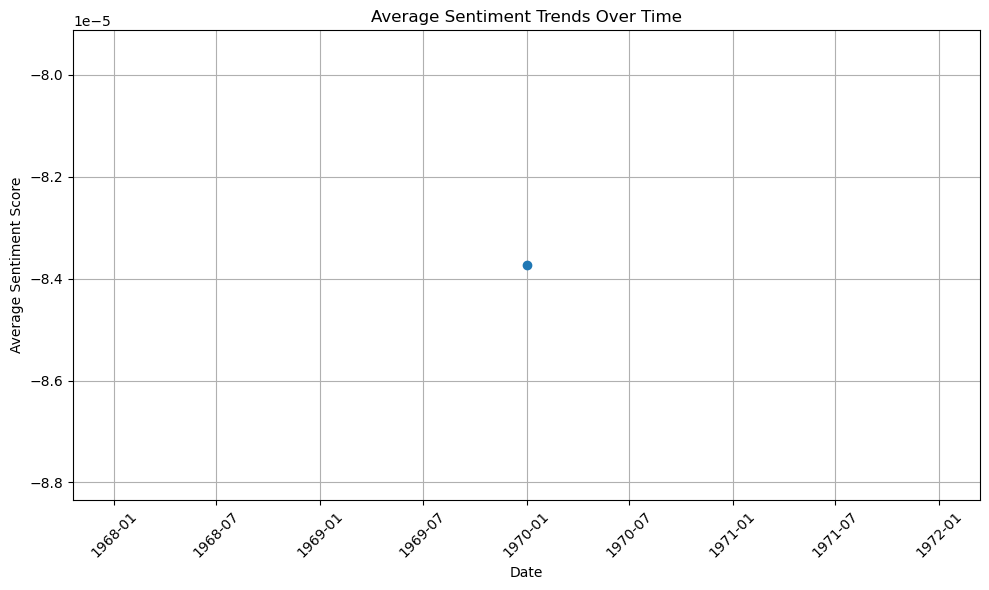

In [117]:
%matplotlib inline
import matplotlib.pyplot as plt

# Plot sentiment trends over time
plt.figure(figsize=(10, 6))
plt.plot(daily_sentiment.index, daily_sentiment.values, marker='o', linestyle='-')
plt.title('Average Sentiment Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
